In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix,
    roc_curve, precision_recall_curve
)

from sklearn.calibration import calibration_curve

plt.style.use("seaborn-v0_8")


In [2]:
# Load test data
X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv").values.ravel()

# Load BEST model (Gradient Boosting)
model = joblib.load("../models/gradient_boosting.pkl")

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Model loaded and predictions generated")


Model loaded and predictions generated


In [4]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", cm)


Accuracy: 0.6735112936344969
Precision: 0.6179245283018868
Recall: 0.6267942583732058
F1 Score: 0.6223277909738717
ROC-AUC: 0.743803999862311
Confusion Matrix:
 [[197  81]
 [ 78 131]]


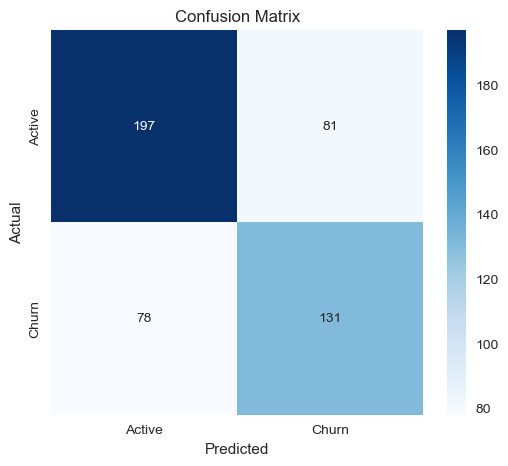

In [5]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Active", "Churn"],
            yticklabels=["Active", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("../visualizations/final_confusion_matrix.png")
plt.show()


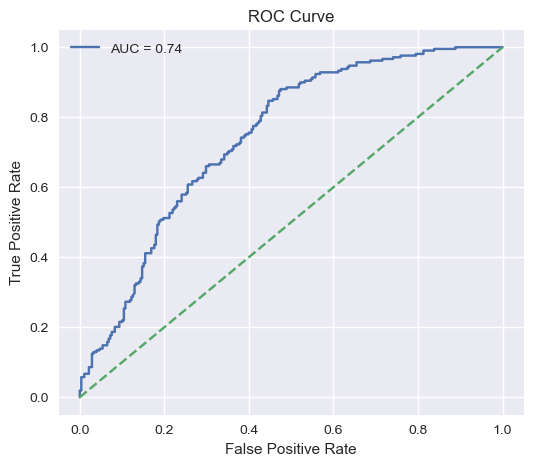

In [6]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.savefig("../visualizations/roc_curve.png")
plt.show()


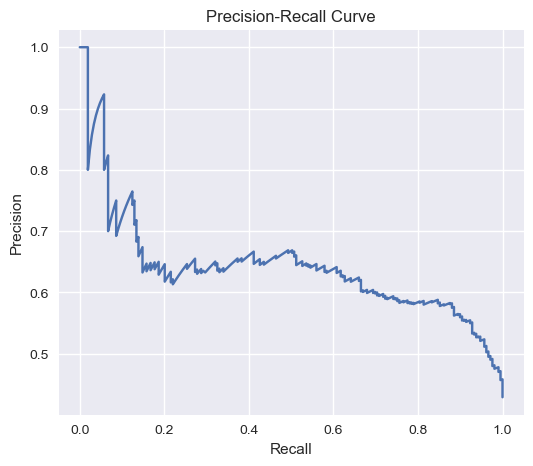

In [7]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.savefig("../visualizations/precision_recall_curve.png")
plt.show()


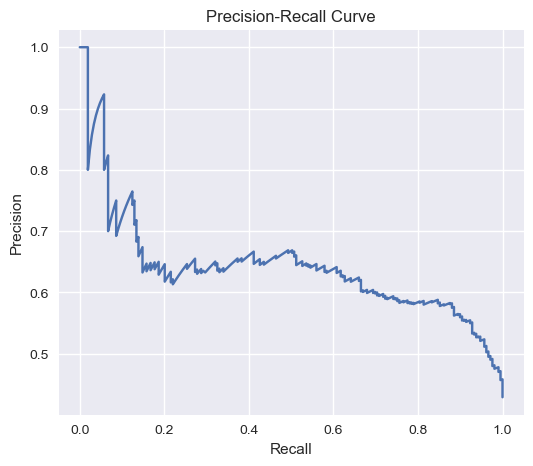

In [8]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.savefig("../visualizations/precision_recall_curve.png")
plt.show()


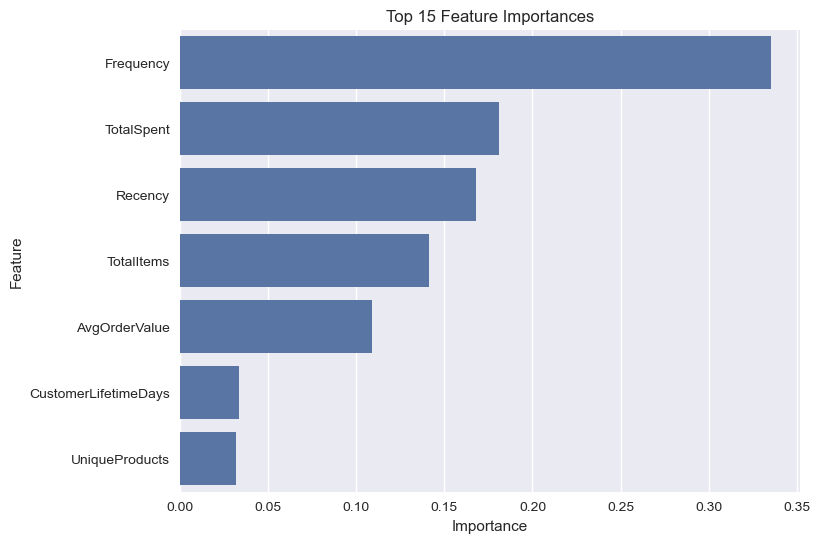

In [9]:
importances = model.feature_importances_
features = X_test.columns

imp_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(data=imp_df, x="Importance", y="Feature")
plt.title("Top 15 Feature Importances")
plt.savefig("../visualizations/feature_importance.png")
plt.show()


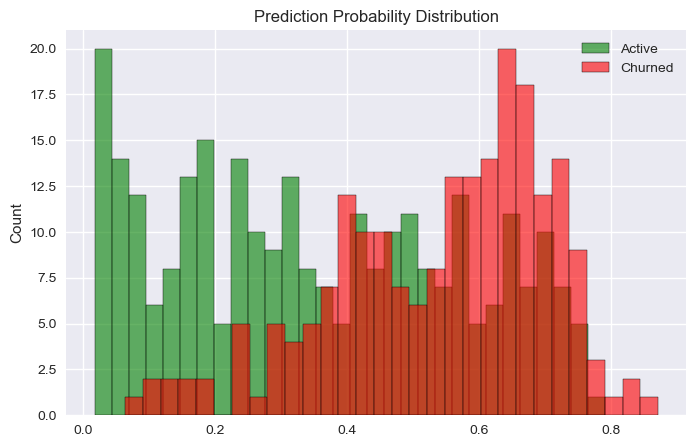

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(y_prob[y_test==0], label="Active", bins=30, color="green", alpha=0.6)
sns.histplot(y_prob[y_test==1], label="Churned", bins=30, color="red", alpha=0.6)
plt.legend()
plt.title("Prediction Probability Distribution")
plt.savefig("../visualizations/prediction_distribution.png")
plt.show()


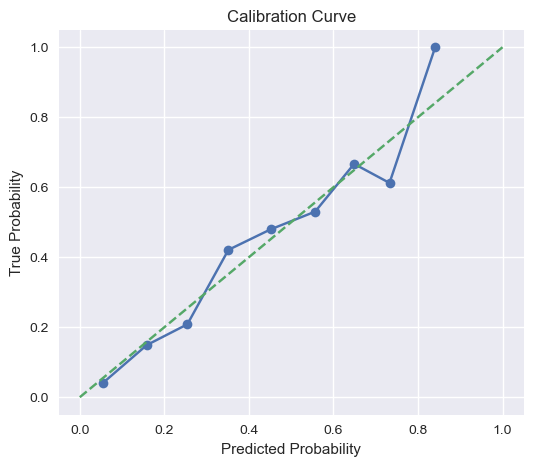

In [11]:
prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=10)

plt.figure(figsize=(6,5))
plt.plot(prob_pred, prob_true, marker="o")
plt.plot([0,1],[0,1],"--")
plt.xlabel("Predicted Probability")
plt.ylabel("True Probability")
plt.title("Calibration Curve")
plt.savefig("../visualizations/calibration_curve.png")
plt.show()


In [12]:
errors = X_test.copy()
errors["Actual"] = y_test
errors["Predicted"] = y_pred
errors["Probability"] = y_prob

misclassified = errors[errors["Actual"] != errors["Predicted"]]
misclassified.head()


,Recency,Frequency,TotalSpent,AvgOrderValue,UniqueProducts,TotalItems,CustomerLifetimeDays,Actual,Predicted,Probability
2,1.146843,-0.257381,-0.455961,0.296834,-0.620575,-0.506831,-0.850921,0,1,0.683090
3,-1.011909,-0.257381,-0.084212,0.001836,-0.124015,0.012588,0.521030,1,0,0.358166
4,0.218078,-0.257381,-0.315153,0.442754,-0.478701,-0.402947,0.297689,0,1,0.576518
6,0.619706,-0.257381,-0.200208,-0.005350,-0.283623,-0.241927,-0.053275,0,1,0.513902
7,2.138363,-0.457998,-0.566591,1.532467,-0.762449,-0.562669,-0.904097,0,1,0.712224
